<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/Bone_Fracture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bone Fracture detection

 This notebook covers the entire procedure for developing a deep learning model to classify images as fractured or not fractured. It covers data loading,preprocessing, augmentation, model training, evaluation, and result visualization, as well as saving the trained model and predicting custom images. This end-to-end procedure ensures an organized approach to creating and deploying an image classification model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np  # Import numpy library for numerical operations
import pandas as pd  # Import pandas library for data manipulation and analysis
import seaborn as sns  # Import seaborn library for data visualization

In [3]:

import os

#Specify the path to your dataset in Google Drive
# Replace 'MyDrive/dataset_folder' with your actual Google Drive folder path
dataset_path = '/content/drive/MyDrive/Bone_fracture/'

# Step 3: Iterate through files in the specified Google Drive path
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Bone_fracture/train/fractured/2-rotated2-rotated3 (1).jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/2-rotated2-rotated2-rotated1 (1).jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/1-rotated3-rotated3-rotated2 (1).jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/2-rotated2-rotated2-rotated1.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/12(1).jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/110.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/1-rotated2-rotated2-rotated1.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/1.png
/content/drive/MyDrive/Bone_fracture/train/fractured/218.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/1-rotated3-rotated3-rotated3.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/134.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/100.jpg
/content/drive/MyDrive/Bone_fracture/train/fractured/1-rotated1-

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [5]:
#This cell defines the paths to the dataset directories for training, validation, and testing.

train_dir = '/content/drive/MyDrive/Bone_fracture/train/'
test_dir = '/content/drive/MyDrive/Bone_fracture/test/'
val_dir = '/content/drive/MyDrive/Bone_fracture/val/'

In [6]:
#This cell defines parameters such as batch size and image dimensions.

BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [7]:
#This cell loads the datasets from the directories using image_dataset_from_directory.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 9246 files belonging to 2 classes.
Found 506 files belonging to 2 classes.
Found 829 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
class_names

['fractured', 'not fractured']

In [9]:
class_names = train_ds.class_names

def show_images(dataset, title):
    plt.figure(figsize=(6, 6))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

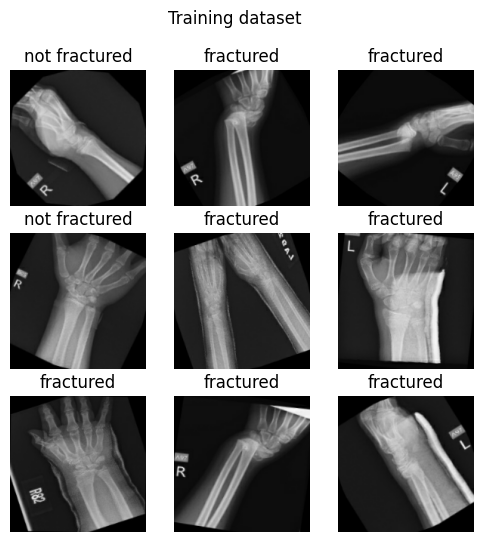

In [10]:
#Plot some images from both class

show_images(train_ds, 'Training dataset')

In [11]:
#Plot class distributions

from pathlib import Path

In [12]:
def count_classes(dataset, class_name):
    dataset_path = Path(dataset)
    return len(list(dataset_path.glob(f"{class_name}/*")))

def create_class_counts_df(dataset, class_names):
    counts = {'class': [], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))
    return pd.DataFrame(counts)

def plot_class_distribution(df, title, palette="viridis"):
    sns.barplot(x='class', y='count', data=df, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

def plot_class_pie_chart(df, title):
    plt.pie(df['count'], labels=df['class'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df)))
    plt.title(title)
    plt.axis('equal')
    plt.show()

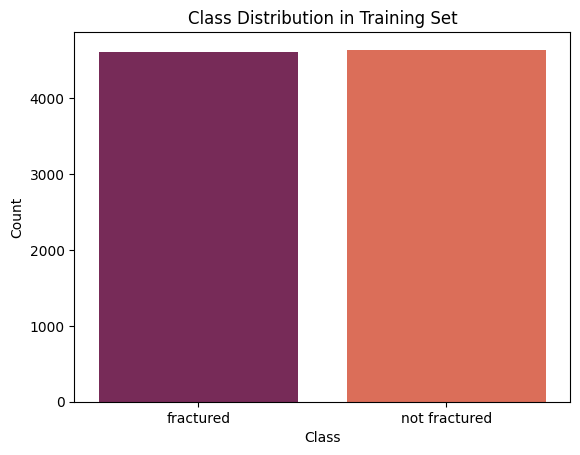

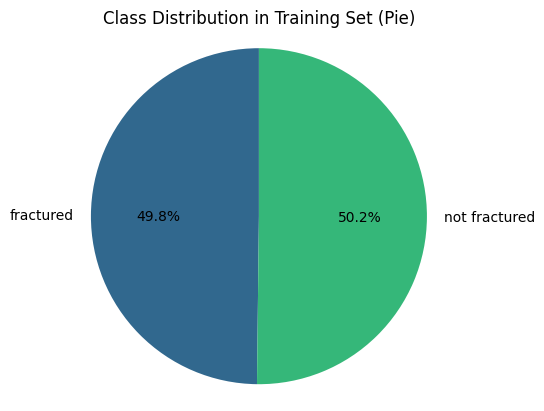

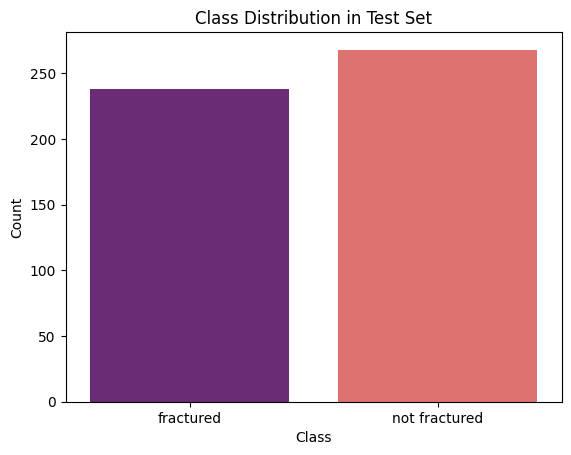

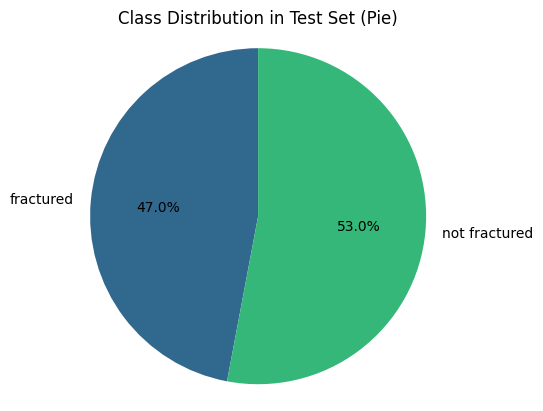

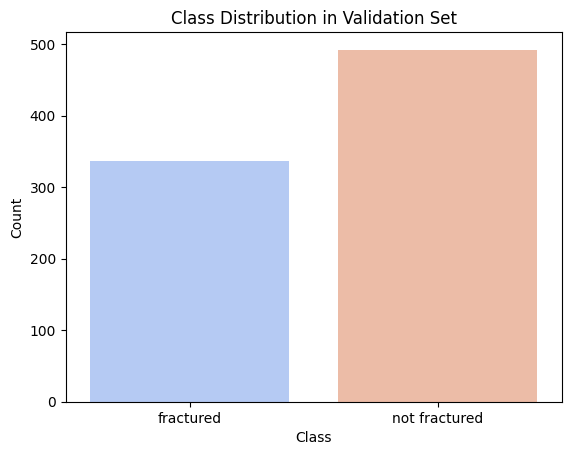

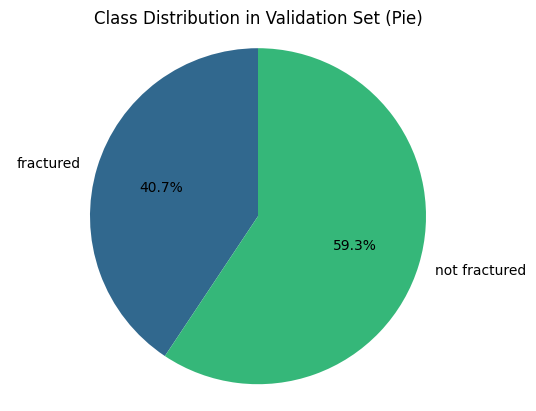

In [13]:
class_names = ['fractured', 'not fractured']

train_df = create_class_counts_df(train_dir, class_names)
test_df = create_class_counts_df(test_dir, class_names)
val_df = create_class_counts_df(val_dir, class_names)

plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='rocket')
plot_class_pie_chart(train_df, 'Class Distribution in Training Set (Pie)')

plot_class_distribution(test_df, 'Class Distribution in Test Set', palette='magma')
plot_class_pie_chart(test_df, 'Class Distribution in Test Set (Pie)')

plot_class_distribution(val_df, 'Class Distribution in Validation Set', palette='coolwarm')
plot_class_pie_chart(val_df, 'Class Distribution in Validation Set (Pie)')

In [14]:
#This cell use ImageDataGenerator for loading and augmenting the training, validation, and test datasets.

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 9246 images belonging to 2 classes.


In [16]:
test_set = train_datagen.flow_from_directory(test_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 506 images belonging to 2 classes.


In [17]:
val_set = train_datagen.flow_from_directory(val_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 829 images belonging to 2 classes.


In [18]:
#This cell defines the Convolutional Neural Network (CNN) model architecture.

model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [20]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),

    # Dense Layer with Dropout
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,385 (1.74 MB)

 Trainable params: 455,425 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [21]:
#This cell compiles the model, specifying the optimizer, loss function, and metrics.

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
#This cell trains the model using the training dataset and validates it using the validation dataset, saving the training history.

tf.debugging.set_log_device_placement(True)

In [24]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [25]:
history = model.fit(training_set,
                    validation_data=val_set,
                    epochs=10,
                    batch_size=BATCH_SIZE)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2173s 7s/step - accuracy: 0.7296 - loss: 0.5405 - val_accuracy: 0.5935 - val_loss: 2.1457
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 126s 424ms/step - accuracy: 0.8198 - loss: 0.4048 - val_accuracy: 0.6659 - val_loss: 1.1031
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 126s 428ms/step - accuracy: 0.8474 - loss: 0.3531 - val_accuracy: 0.5320 - val_loss: 2.1090
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 140s 419ms/step - accuracy: 0.9031 - loss: 0.2512 - val_accuracy: 0.7744 - val_loss: 0.5595
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 126s 429ms/step - accuracy: 0.9316 - loss: 0.1901 - val_accuracy: 0.7648 - val_loss: 0.8106
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 144s 432ms/step - accuracy: 0.9488 - loss: 0.1396 - val_accuracy: 0.8625 - val_loss: 0.3780
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 140s 423ms/step - accuracy: 0.9664 - loss: 0.1015 - val_accuracy: 0.8878 - val_loss: 0.2856
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 147s 445ms/step - accuracy: 0.9710 - l

In [26]:
history = model.fit(training_set,
                   validation_data=test_set,
                   epochs=10
                   )

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9847 - loss: 0.0556 - val_accuracy: 0.6996 - val_loss: 0.9886
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 161s 405ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.8439 - val_loss: 0.5307
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 120s 406ms/step - accuracy: 0.9837 - loss: 0.0446 - val_accuracy: 0.9209 - val_loss: 0.3360
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 142s 403ms/step - accuracy: 0.9851 - loss: 0.0404 - val_accuracy: 0.8676 - val_loss: 0.3381
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 141s 403ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.7312 - val_loss: 1.0516
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 142s 402ms/step - accuracy: 0.9868 - loss: 0.0396 - val_accuracy: 0.9071 - val_loss: 0.3049
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 120s 405ms/step - accuracy: 0.9883 - loss: 0.0335 - val_accuracy: 0.8814 - val_loss: 0.3989
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 141s 400ms/step - accuracy: 0.9925 - lo

In [27]:
#This cell evaluates the trained model on the test dataset and prints the accuracy and loss.

test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 483ms/step - accuracy: 0.5299 - loss: 4.6198
Test Accuracy: 0.52
Test Loss: 5.01


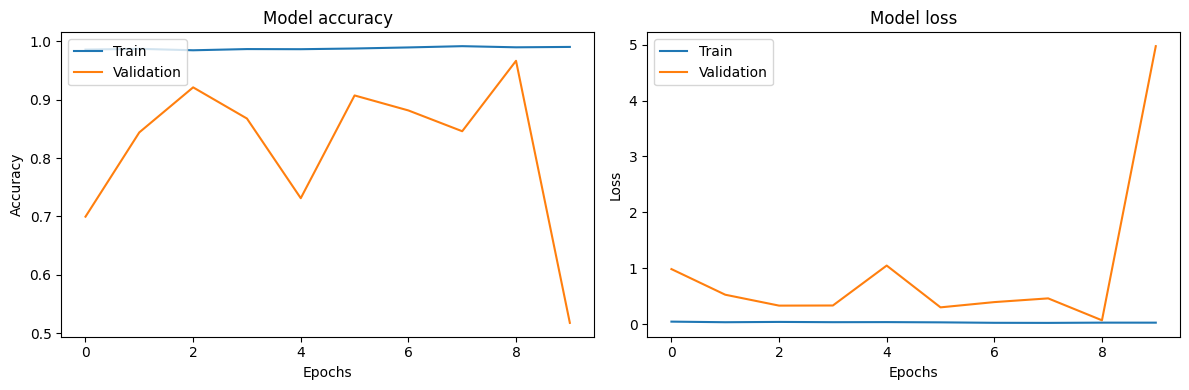

In [28]:
#This cell plots the training and validation accuracy and loss over the epochs.

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
#This cell saves the trained model to an .h5 file

model.save('fracture_classification_model.h5')

In [30]:
#This cell loads the saved model from the .h5 file.

loaded_model = tf.keras.models.load_model('fracture_classification_model.h5')

In [33]:
#This cell defines a function to load and preprocess a custom image.

def load_preprocessed_image(image_path, img_height=180, img_width=180):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((img_height, img_width))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_path = '/content/drive/MyDrive/Bone_fracture/train/not fractured/2.png'
preprocessed_img = load_preprocessed_image(image_path)

In [34]:
#Make Predictions on Custom Image

predictions = loaded_model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)  # Assuming categorical output
class_names = ['fractured', 'not fractured']
# For binary classification, use:
predicted_class = (predictions > 0.5).astype("int32")

# Print the predicted class
print(f"Predicted class: {class_names[predicted_class[0][0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
Predicted class: fractured
